In [1]:
%%time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels
import numpy as np 
import matplotlib.gridspec as gridspec

CPU times: user 1.61 s, sys: 1.15 s, total: 2.76 s
Wall time: 6.37 s


In [2]:
%%time
df = pd.read_csv("pp-complete.csv")

CPU times: user 57.8 s, sys: 30.1 s, total: 1min 27s
Wall time: 4min 14s


In [3]:
df

,{5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A},42000,1995-12-21 00:00,NE4 9DN,S,N,F,8,Unnamed: 8,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE.1,TYNE AND WEAR,A,A.1
0,{20E2441A-0F16-49AB-97D4-8737E62A5D93},95000,1995-03-03 00:00,RM16 4UR,S,N,F,30,NaN,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,A,A
1,{D893EE64-4464-44B5-B01B-8E62403ED83C},74950,1995-10-03 00:00,CW10 9ES,D,Y,F,15,NaN,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,A,A
2,{F9F753A8-E56A-4ECC-9927-8E626A471A92},43500,1995-11-14 00:00,TS23 3LA,S,N,F,19,NaN,SLEDMERE CLOSE,BILLINGHAM,BILLINGHAM,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A
3,{E166398A-A19E-470E-BB5A-83B4C254CF6D},63000,1995-09-08 00:00,CA25 5QH,S,N,F,8,NaN,CROSSINGS CLOSE,CLEATOR MOOR,CLEATOR MOOR,COPELAND,CUMBRIA,A,A
4,{A9A3C463-3CA0-4D71-8CF9-83B4D0536EEA},29995,1995-05-12 00:00,PE14 8JF,S,N,F,114,NaN,SMEETH ROAD,ST JOHNS FEN END,WISBECH,KING'S LYNN AND WEST NORFOLK,NORFOLK,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910948,{E7B085FD-1E29-7E31-E053-6C04A8C0E67F},655995,2022-02-21 00:00,LS29 6GL,D,Y,F,19,NaN,PLOVER FIELD,MENSTON,ILKLEY,BRADFORD,WEST YORKSHIRE,A,A
27910949,{E7B085FD-1E2A-7E31-E053-6C04A8C0E67F},349950,2022-02-25 00:00,WF1 4FZ,D,Y,F,24,NaN,BLACKWELL CRESCENT,NaN,WAKEFIELD,WAKEFIELD,WEST YORKSHIRE,A,A
27910950,{E7B085FD-1E2B-7E31-E053-6C04A8C0E67F},245000,2022-07-14 00:00,LS14 6ZF,S,N,F,16,NaN,BLENCARN DRIVE,SEACROFT,LEEDS,LEEDS,WEST YORKSHIRE,A,A
27910951,{E7B085FD-1E2C-7E31-E053-6C04A8C0E67F},419950,2022-01-28 00:00,WF1 4FZ,D,Y,F,14,NaN,BLACKWELL CRESCENT,NaN,WAKEFIELD,WAKEFIELD,WEST YORKSHIRE,A,A


In [4]:
df.rename(columns = {"{5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A}": 'Transaction unique identifier',
                    "42000": "Price","1995-12-21 00:00":"Date of Transfer","NE4 9DN": "Postcode","S":"Property Type","N":"Old/New","F":"Duration",
                    "8":"PAON","Unnamed: 8":"SAON","MATFEN PLACE":"Street","FENHAM":"Locality","NEWCASTLE UPON TYNE":"Town/City",
                    "NEWCASTLE UPON TYNE.1":"District","TYNE AND WEAR":"County","A":"PPD Category Type","A.1":"Record Status - monthly file only"},inplace = True)

# Its ok to rename this column thats acutally part of the dataframe since this row is not part of South East England

In [5]:
df

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{20E2441A-0F16-49AB-97D4-8737E62A5D93},95000,1995-03-03 00:00,RM16 4UR,S,N,F,30,NaN,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,A,A
1,{D893EE64-4464-44B5-B01B-8E62403ED83C},74950,1995-10-03 00:00,CW10 9ES,D,Y,F,15,NaN,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,A,A
2,{F9F753A8-E56A-4ECC-9927-8E626A471A92},43500,1995-11-14 00:00,TS23 3LA,S,N,F,19,NaN,SLEDMERE CLOSE,BILLINGHAM,BILLINGHAM,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A
3,{E166398A-A19E-470E-BB5A-83B4C254CF6D},63000,1995-09-08 00:00,CA25 5QH,S,N,F,8,NaN,CROSSINGS CLOSE,CLEATOR MOOR,CLEATOR MOOR,COPELAND,CUMBRIA,A,A
4,{A9A3C463-3CA0-4D71-8CF9-83B4D0536EEA},29995,1995-05-12 00:00,PE14 8JF,S,N,F,114,NaN,SMEETH ROAD,ST JOHNS FEN END,WISBECH,KING'S LYNN AND WEST NORFOLK,NORFOLK,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910948,{E7B085FD-1E29-7E31-E053-6C04A8C0E67F},655995,2022-02-21 00:00,LS29 6GL,D,Y,F,19,NaN,PLOVER FIELD,MENSTON,ILKLEY,BRADFORD,WEST YORKSHIRE,A,A
27910949,{E7B085FD-1E2A-7E31-E053-6C04A8C0E67F},349950,2022-02-25 00:00,WF1 4FZ,D,Y,F,24,NaN,BLACKWELL CRESCENT,NaN,WAKEFIELD,WAKEFIELD,WEST YORKSHIRE,A,A
27910950,{E7B085FD-1E2B-7E31-E053-6C04A8C0E67F},245000,2022-07-14 00:00,LS14 6ZF,S,N,F,16,NaN,BLENCARN DRIVE,SEACROFT,LEEDS,LEEDS,WEST YORKSHIRE,A,A
27910951,{E7B085FD-1E2C-7E31-E053-6C04A8C0E67F},419950,2022-01-28 00:00,WF1 4FZ,D,Y,F,14,NaN,BLACKWELL CRESCENT,NaN,WAKEFIELD,WAKEFIELD,WEST YORKSHIRE,A,A


In [6]:
South_east = ['OXFORDSHIRE','BUCKINGHAMSHIRE','BERKSHIRE','SURREY','KENT','EAST SUSSEX','WEST SUSSEX','ISLE OF WIGHT','HAMPSHIRE']

In [7]:
df1 = df.drop('Transaction unique identifier' ,axis = 1)

In [8]:
# Filter out counties outisde of South East England
mask = df['County'].isin(['OXFORDSHIRE','BUCKINGHAMSHIRE','BERKSHIRE','SURREY','KENT','EAST SUSSEX','WEST SUSSEX','ISLE OF WIGHT','HAMPSHIRE'])
df2 = df1.loc[mask]

In [9]:
df2

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
22,95000,1995-11-17 00:00,GU32 1LJ,S,Y,F,2,NaN,CROSS ROAD COTTAGES,WEST MEON,PETERSFIELD,WINCHESTER,HAMPSHIRE,A,A
32,39000,1995-05-19 00:00,BN16 2TJ,F,N,L,RICHMOND COURT,FLAT 5,SEA LANE,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
40,62800,1995-06-30 00:00,RH15 9JS,S,N,F,54,NaN,POTTERS LANE,BURGESS HILL,BURGESS HILL,MID SUSSEX,WEST SUSSEX,A,A
41,59500,1995-02-07 00:00,GU34 2EW,T,N,F,108,NaN,GREENFIELDS AVENUE,ALTON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A
45,142000,1995-01-27 00:00,RG20 8XB,D,N,F,HOMESTEAD,NaN,GREEN LANE,CHIEVELEY,NEWBURY,NEWBURY,BERKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910699,825000,2022-08-02 00:00,RH19 2QA,S,N,F,BELMONT,NaN,FELCOT ROAD,FURNACE WOOD,EAST GRINSTEAD,MID SUSSEX,WEST SUSSEX,A,A
27910700,75000,2022-01-19 00:00,PO19 6EA,F,N,L,194,NaN,LONGLEY ROAD,NaN,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A
27910701,217000,2022-07-01 00:00,RH12 2TA,F,N,L,GREENACRES,27,NORTH PARADE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A
27910702,185000,2022-03-11 00:00,RH10 8XG,F,N,L,15,NaN,BOWMAN COURT,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A


In [10]:
print("Skewness : %f" % df2['Price'].skew() )
print("Kurtosis : %f" % df2['Price'].kurt())

Skewness : 83.050513
Kurtosis : 13105.210132


In [11]:
df2['County'].value_counts()

KENT               793447
HAMPSHIRE          730614
SURREY             628227
WEST SUSSEX        484498
EAST SUSSEX        346126
OXFORDSHIRE        335229
BUCKINGHAMSHIRE    272248
ISLE OF WIGHT       91551
BERKSHIRE            9245
Name: County, dtype: int64

In [12]:
county_counts = df2['County'].value_counts()

# Calculate the percentage of each county
county_percentages = county_counts / len(df2) * 100

# Create a new DataFrame with the results
county_df = pd.DataFrame({
    'County': county_percentages.index,
    'Percentage of dataframe': county_percentages.values
})

# Print the new DataFrame
county_df

,County,Percentage of dataframe
0,KENT,21.495726
1,HAMPSHIRE,19.793481
2,SURREY,17.019656
3,WEST SUSSEX,13.125812
4,EAST SUSSEX,9.377097
5,OXFORDSHIRE,9.081880
6,BUCKINGHAMSHIRE,7.375626
7,ISLE OF WIGHT,2.480260
8,BERKSHIRE,0.250462


In [13]:
county_df1 = df2.sort_values(by='Date of Transfer', ascending=False)

# Filter the DataFrame by county
county_df = county_df1[county_df1['County'] == 'BERKSHIRE']

# Select the latest data entry for the county
latest_entry = county_df.iloc[0]

latest_entry

Price                                          186000
Date of Transfer                     2004-08-31 00:00
Postcode                                      RG8 8EW
Property Type                                       F
Old/New                                             N
Duration                                            L
PAON                                                8
SAON                                              NaN
Street                                 SAUNDERS COURT
Locality                             PURLEY ON THAMES
Town/City                                     READING
District                               WEST BERKSHIRE
County                                      BERKSHIRE
PPD Category Type                                   A
Record Status - monthly file only                   A
Name: 10944320, dtype: object

As we can see, the latest data entry for Berkshire in the dataset was in 2004. For this reason it would be unreliable to continue including this in the data for prediciting housing prices using 'out of date' data as this would perform poorly on future house predictions. 

Therefore we will drop this county from the dataset.

In [14]:
df2 = df2[df2['County'] != 'BERKSHIRE']

In [15]:
# check that Berkshire has been removed
df2['County'].value_counts()

KENT               793447
HAMPSHIRE          730614
SURREY             628227
WEST SUSSEX        484498
EAST SUSSEX        346126
OXFORDSHIRE        335229
BUCKINGHAMSHIRE    272248
ISLE OF WIGHT       91551
Name: County, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Property Type'>

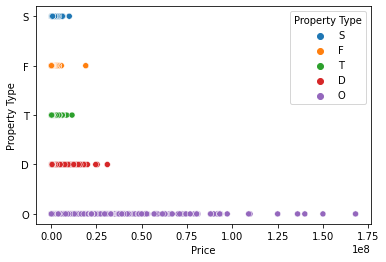

In [16]:
sns.scatterplot(x = df2['Price'] , y = df2['Property Type'] ,hue =df2['Property Type'])

In [17]:
df2.isnull().sum()

Price                                      0
Date of Transfer                           0
Postcode                                7513
Property Type                              0
Old/New                                    0
Duration                                   0
PAON                                      71
SAON                                 3194708
Street                                 38226
Locality                             1292785
Town/City                                  0
District                                   0
County                                     0
PPD Category Type                          0
Record Status - monthly file only          0
dtype: int64

In [18]:
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
Dataframe_missing = pd.DataFrame(missing_data)
Dataframe_missing.style.set_caption("Complete dataset")

,Total,Percent
SAON,3194708,0.867670
Locality,1292785,0.351115
Street,38226,0.010382
Postcode,7513,0.002041
PAON,71,0.000019
Record Status - monthly file only,0,0.000000
PPD Category Type,0,0.000000
County,0,0.000000
District,0,0.000000
Town/City,0,0.000000


In [19]:
# Drop irrelevant columns
df3 = df2.drop(['SAON','Locality'],axis = 1)

# Drop rest of missing values
df3 = df3.dropna(subset = ['Street', 'PAON','Postcode'] , axis = 0)
df3

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,Street,Town/City,District,County,PPD Category Type,Record Status - monthly file only
22,95000,1995-11-17 00:00,GU32 1LJ,S,Y,F,2,CROSS ROAD COTTAGES,PETERSFIELD,WINCHESTER,HAMPSHIRE,A,A
32,39000,1995-05-19 00:00,BN16 2TJ,F,N,L,RICHMOND COURT,SEA LANE,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
40,62800,1995-06-30 00:00,RH15 9JS,S,N,F,54,POTTERS LANE,BURGESS HILL,MID SUSSEX,WEST SUSSEX,A,A
41,59500,1995-02-07 00:00,GU34 2EW,T,N,F,108,GREENFIELDS AVENUE,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A
48,59999,1995-01-31 00:00,OX11 0AA,S,N,F,10,PARK CLOSE,DIDCOT,SOUTH OXFORDSHIRE,OXFORDSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910699,825000,2022-08-02 00:00,RH19 2QA,S,N,F,BELMONT,FELCOT ROAD,EAST GRINSTEAD,MID SUSSEX,WEST SUSSEX,A,A
27910700,75000,2022-01-19 00:00,PO19 6EA,F,N,L,194,LONGLEY ROAD,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A
27910701,217000,2022-07-01 00:00,RH12 2TA,F,N,L,GREENACRES,NORTH PARADE,HORSHAM,HORSHAM,WEST SUSSEX,A,A
27910702,185000,2022-03-11 00:00,RH10 8XG,F,N,L,15,BOWMAN COURT,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A


In [20]:
total_02 = df3.isnull().sum().sort_values(ascending=False)
percent_02= (df3.isnull().sum()/df3.isnull().count()).sort_values(ascending=False)
missing_data_02 = pd.concat([total_02, percent_02], axis=1, keys=['Total', 'Percent'])
Dataframe_missing_02 = pd.DataFrame(missing_data_02)
Dataframe_missing_02.style.set_caption("Complete dataset removed NA")

,Total,Percent
Record Status - monthly file only,0,0.000000
PPD Category Type,0,0.000000
County,0,0.000000
District,0,0.000000
Town/City,0,0.000000
Street,0,0.000000
PAON,0,0.000000
Duration,0,0.000000
Old/New,0,0.000000
Property Type,0,0.000000


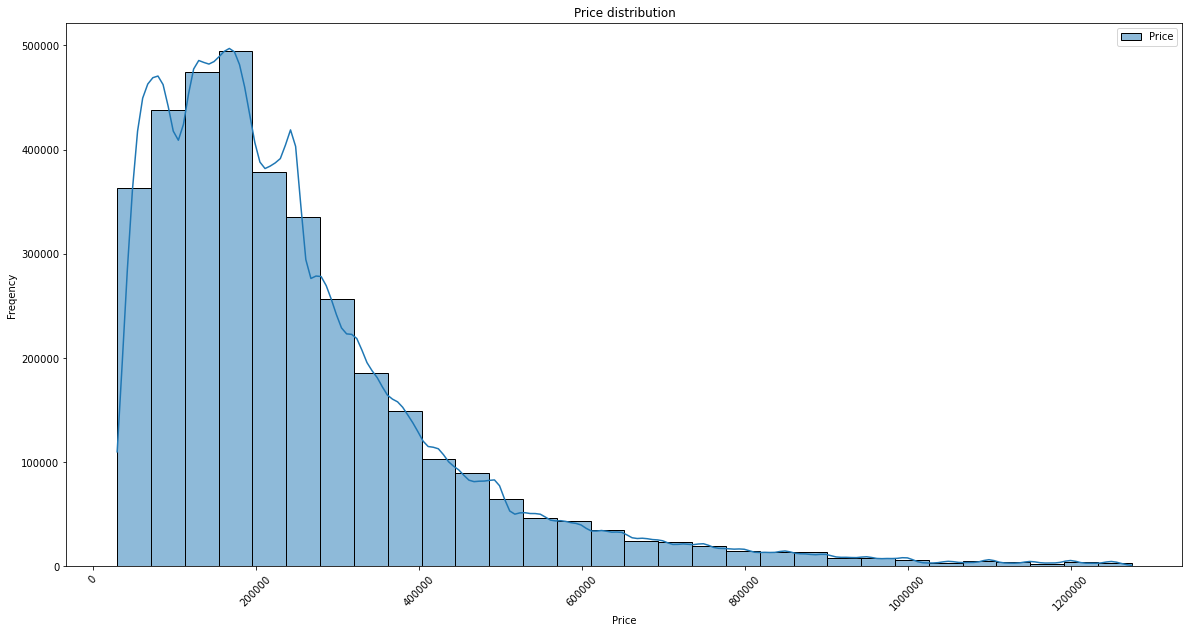

In [21]:
# These values can be adjusted to the housing agents desire.
plt.figure(figsize = (20,10))
lq = df2["Price"].quantile(0.01)
uq = df2["Price"].quantile(0.99)
# print(lq)
# print(uq)
df_filtered = df2[(df2["Price"] < uq) & (df2["Price"] > lq)]
graph = sns.histplot(df_filtered, bins = 30,kde = True);
graph.set_title("Price distribution");
graph.set_xlabel('Price');
graph.set_ylabel('Freqency');
graph.ticklabel_format(useOffset=False);
plt.ticklabel_format(style='plain') # removes scientific notation
plt.xticks(rotation=45);

# The graph below showing a 99% distribution confidence interval of house prices.
# kernal density estimate

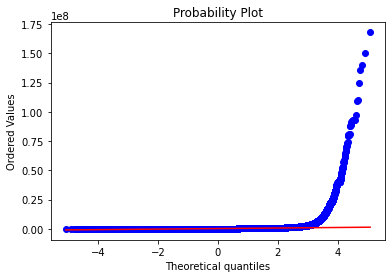

In [22]:
res = stats.probplot(df3['Price'], plot=plt)

# This shows that that house prices are not normally distributed.
# Right skewed data (positive skew)

<AxesSubplot:xlabel='Price', ylabel='Property Type'>

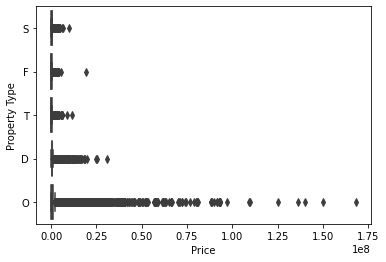

In [23]:
sns.boxplot(x = df2['Price'] , y = df2['Property Type'])

In [ ]:
# Filtering out the outliers based on property type column
# Method: removing lower 1% of data and 1.5*IQR + q3 for upper tail.


In [24]:
# Outliers removed for property type D
filt_D = df2['Property Type'] == 'D'
df_filtD = df2.loc[filt_D]
q1 = df_filtD["Price"].quantile(0.25)
q3 = df_filtD["Price"].quantile(0.75)
lq = df_filtD["Price"].quantile(0.01) # $30,000 and below 
iqr = q3 - q1
df_filt1_priceD = df_filtD[(df_filtD["Price"] < q3 + 1.5*iqr) & (df_filtD["Price"] > lq)]
df_filt1_priceD

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
132,142500,1995-11-30 00:00,GU34 3EL,D,N,F,WHEELS,NaN,GOSPORT ROAD,LOWER FARRINGDON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A
147,111000,1995-08-17 00:00,DA3 7DF,D,N,F,CATKINS,NaN,GORSEWOOD ROAD,HARTLEY,LONGFIELD,SEVENOAKS,KENT,A,A
182,102500,1995-07-28 00:00,PO20 8PX,D,N,F,KILMEEN,NaN,BRIAR AVENUE,WEST WITTERING,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A
201,425000,1995-03-31 00:00,KT11 1HP,D,N,F,18,NaN,BRUNSWICK GROVE,COBHAM,COBHAM,ELMBRIDGE,SURREY,A,A
221,94000,1995-10-27 00:00,ME15 9XA,D,N,F,18,NaN,HALSTOW CLOSE,MAIDSTONE,MAIDSTONE,MAIDSTONE,KENT,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910673,500000,2022-07-01 00:00,RH13 8LF,D,N,F,41,NaN,STAPLES HILL,PARTRIDGE GREEN,HORSHAM,HORSHAM,WEST SUSSEX,A,A
27910681,625000,2022-04-14 00:00,PO20 8BT,D,N,F,52,NaN,OAKFIELD AVENUE,EAST WITTERING,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A
27910693,667000,2022-07-20 00:00,RH20 4EP,D,N,F,8,NaN,JOHN IRELAND WAY,WASHINGTON,PULBOROUGH,HORSHAM,WEST SUSSEX,A,A
27910694,450000,2022-01-25 00:00,RH16 4UT,D,N,F,26,NaN,CHANDLERS FIELD DRIVE,NaN,HAYWARDS HEATH,MID SUSSEX,WEST SUSSEX,A,A


In [25]:
# Outliers removed for property type F
filt_F = df2['Property Type'] == 'F'
df_filtF = df2.loc[filt_F]
q1 = df_filtF["Price"].quantile(0.25)
q3 = df_filtF["Price"].quantile(0.75)
lq = df_filtF["Price"].quantile(0.01)
iqr = q3 - q1
df_filt1_priceF = df_filtF[(df_filtF["Price"] < q3 + 1.5*iqr) & (df_filtF["Price"] > lq)]
df_filt1_priceF

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
32,39000,1995-05-19 00:00,BN16 2TJ,F,N,L,RICHMOND COURT,FLAT 5,SEA LANE,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
53,48000,1995-02-20 00:00,GU29 9TQ,F,N,L,56,NaN,BARLAVINGTON WAY,MIDHURST,MIDHURST,CHICHESTER,WEST SUSSEX,A,A
87,40000,1995-06-30 00:00,KT15 1UX,F,N,L,42,NaN,MONKS CRESCENT,ADDLESTONE,ADDLESTONE,RUNNYMEDE,SURREY,A,A
111,38000,1995-11-02 00:00,SO52 9AT,F,N,L,ST GEORGES COURT,FLAT 23,BRACKEN ROAD,NORTH BADDESLEY,SOUTHAMPTON,TEST VALLEY,HAMPSHIRE,A,A
163,115000,1995-02-28 00:00,PO19 3PY,F,N,L,NORTHLANDS HOUSE,FLAT 5,SALTHILL ROAD,CHICHESTER,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910698,199008,2022-08-11 00:00,RH16 3TX,F,N,L,22,NaN,THE PINES,NaN,HAYWARDS HEATH,MID SUSSEX,WEST SUSSEX,A,A
27910700,75000,2022-01-19 00:00,PO19 6EA,F,N,L,194,NaN,LONGLEY ROAD,NaN,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A
27910701,217000,2022-07-01 00:00,RH12 2TA,F,N,L,GREENACRES,27,NORTH PARADE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A
27910702,185000,2022-03-11 00:00,RH10 8XG,F,N,L,15,NaN,BOWMAN COURT,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A


In [26]:
# Outliers removed for property type O
filt_O = df2['Property Type'] == 'O'
df_filtO = df2.loc[filt_O]
q1 = df_filtO["Price"].quantile(0.25)
q3 = df_filtO["Price"].quantile(0.75)
lq = df_filtO["Price"].quantile(0.01)
iqr = q3 - q1
df_filt1_priceO = df_filtO[(df_filtO["Price"] < q3 + 1.5*iqr) & (df_filtO["Price"] > lq)]
df_filt1_priceO

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
372340,37200,1995-11-30 00:00,SO31 9HG,O,N,F,SOLENT BREEZES,32,HOOK LANE,WARSASH,SOUTHAMPTON,FAREHAM,HAMPSHIRE,B,A
559682,253000,1995-11-01 00:00,TN39 3PS,O,N,L,OLIVERS PRINTERS,NaN,EASTWOOD ROAD,NaN,BEXHILL-ON-SEA,ROTHER,EAST SUSSEX,B,A
727352,267800,1995-09-29 00:00,GU9 9TF,O,N,F,12,NaN,AYLING COURT,NaN,FARNHAM,WAVERLEY,SURREY,B,A
3271007,5500,1998-09-29 00:00,NaN,O,N,L,GARAGE 10,NaN,KINGSWOOD COURT,NaN,WOKING,WOKING,SURREY,B,A
3999760,1250,1999-02-17 00:00,NaN,O,N,L,DOWNVIEW COURT,GARAGE 7,BOUNDARY ROAD,NaN,WORTHING,WORTHING,WEST SUSSEX,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27799450,64995,2022-01-28 00:00,CT10 1NF,O,N,L,54,BASEMENT AND GROUND FLOOR,ALBION STREET,NaN,BROADSTAIRS,THANET,KENT,B,A
27799453,457500,2022-01-31 00:00,DA1 2DH,O,N,F,"ORCHARD HOUSE, 31",NaN,ORCHARD STREET,NaN,DARTFORD,DARTFORD,KENT,B,A
27799456,110000,2022-02-09 00:00,TN4 9TU,O,N,L,81B,NaN,ST JOHNS ROAD,NaN,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,B,A
27799460,800000,2022-02-14 00:00,CT1 3ZA,O,N,F,2,NaN,ROSELANDS PLACE,NaN,CANTERBURY,CANTERBURY,KENT,B,A


In [27]:
# Outliers removed for property type T
filt_T = df2['Property Type'] == 'T'
df_filtT = df2.loc[filt_T]
q1 = df_filtT["Price"].quantile(0.25)
q3 = df_filtT["Price"].quantile(0.75)
lq = df_filtT["Price"].quantile(0.01)
iqr = q3 - q1
df_filt1_priceT = df_filtT[(df_filtT["Price"] < q3 + 1.5*iqr) & (df_filtT["Price"] > lq)]
df_filt1_priceT

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
41,59500,1995-02-07 00:00,GU34 2EW,T,N,F,108,NaN,GREENFIELDS AVENUE,ALTON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A
66,88000,1995-11-15 00:00,TN14 7JP,T,N,F,ASH TREE COTTAGES,3,OLD LONDON ROAD,KNOCKHOLT,SEVENOAKS,SEVENOAKS,KENT,A,A
74,54000,1995-12-20 00:00,MK18 3QZ,T,N,F,7,NaN,RUDDS CLOSE,WINSLOW,BUCKINGHAM,AYLESBURY VALE,BUCKINGHAMSHIRE,A,A
105,45700,1995-11-10 00:00,CT18 7NE,T,N,F,55,NaN,WOODCOCK GARDENS,HAWKINGE,FOLKESTONE,SHEPWAY,KENT,A,A
120,42500,1995-10-27 00:00,RG26 5LQ,T,N,L,4,NaN,HEATH COURT,BAUGHURST,TADLEY,BASINGSTOKE AND DEANE,HAMPSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910678,317000,2022-04-05 00:00,BN16 1AD,T,N,F,129,NaN,DOWNS WAY,EAST PRESTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
27910683,365000,2022-08-10 00:00,BN16 3PE,T,N,F,19,NaN,WALDERS ROAD,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
27910684,355000,2022-07-05 00:00,PO21 5AP,T,N,F,9,NaN,ALDING CRESCENT,NaN,BOGNOR REGIS,ARUN,WEST SUSSEX,A,A
27910690,385000,2022-07-12 00:00,RH14 9GW,T,N,F,13,NaN,BLACKTHORN AVENUE,NaN,BILLINGSHURST,HORSHAM,WEST SUSSEX,A,A


In [28]:
# Outliers removed for property type S
filt_S = df2['Property Type'] == 'S'
df_filtS = df2.loc[filt_S]
q1 = df_filtS["Price"].quantile(0.25)
q3 = df_filtS["Price"].quantile(0.75)
lq = df_filtS["Price"].quantile(0.01)
iqr = q3 - q1
df_filt1_priceS = df_filtS[(df_filtS["Price"] < q3 + 1.5*iqr) & (df_filtS["Price"] > lq)]
df_filt1_priceS

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
22,95000,1995-11-17 00:00,GU32 1LJ,S,Y,F,2,NaN,CROSS ROAD COTTAGES,WEST MEON,PETERSFIELD,WINCHESTER,HAMPSHIRE,A,A
40,62800,1995-06-30 00:00,RH15 9JS,S,N,F,54,NaN,POTTERS LANE,BURGESS HILL,BURGESS HILL,MID SUSSEX,WEST SUSSEX,A,A
48,59999,1995-01-31 00:00,OX11 0AA,S,N,F,10,NaN,PARK CLOSE,DIDCOT,DIDCOT,SOUTH OXFORDSHIRE,OXFORDSHIRE,A,A
49,69950,1995-06-27 00:00,SO52 9GY,S,N,F,16,NaN,RINGWOOD DRIVE,NORTH BADDESLEY,SOUTHAMPTON,TEST VALLEY,HAMPSHIRE,A,A
57,147000,1995-11-29 00:00,CT15 4BG,S,N,F,COPLEY HOUSE,NaN,THE STREET,EYTHORNE,DOVER,DOVER,KENT,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910675,425000,2022-06-21 00:00,BN44 3RQ,S,N,F,41,NaN,SHOOTING FIELD,NaN,STEYNING,HORSHAM,WEST SUSSEX,A,A
27910679,325000,2022-04-13 00:00,PO22 8GJ,S,N,F,47,NaN,WOOD HILL WAY,FELPHAM,BOGNOR REGIS,ARUN,WEST SUSSEX,A,A
27910685,460000,2022-05-10 00:00,RH19 4NR,S,N,F,16A,NaN,BARTON CRESCENT,NaN,EAST GRINSTEAD,MID SUSSEX,WEST SUSSEX,A,A
27910692,535000,2022-07-22 00:00,RH13 6AZ,S,N,F,7,NaN,BRAMBLING CLOSE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A


In [29]:
filtered_df_property_outliers = pd.concat([df_filt1_priceD, df_filt1_priceF,df_filt1_priceO,df_filt1_priceS,df_filt1_priceT], axis=0)
filtered_df_property_outliers

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
132,142500,1995-11-30 00:00,GU34 3EL,D,N,F,WHEELS,NaN,GOSPORT ROAD,LOWER FARRINGDON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A
147,111000,1995-08-17 00:00,DA3 7DF,D,N,F,CATKINS,NaN,GORSEWOOD ROAD,HARTLEY,LONGFIELD,SEVENOAKS,KENT,A,A
182,102500,1995-07-28 00:00,PO20 8PX,D,N,F,KILMEEN,NaN,BRIAR AVENUE,WEST WITTERING,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A
201,425000,1995-03-31 00:00,KT11 1HP,D,N,F,18,NaN,BRUNSWICK GROVE,COBHAM,COBHAM,ELMBRIDGE,SURREY,A,A
221,94000,1995-10-27 00:00,ME15 9XA,D,N,F,18,NaN,HALSTOW CLOSE,MAIDSTONE,MAIDSTONE,MAIDSTONE,KENT,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910678,317000,2022-04-05 00:00,BN16 1AD,T,N,F,129,NaN,DOWNS WAY,EAST PRESTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
27910683,365000,2022-08-10 00:00,BN16 3PE,T,N,F,19,NaN,WALDERS ROAD,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
27910684,355000,2022-07-05 00:00,PO21 5AP,T,N,F,9,NaN,ALDING CRESCENT,NaN,BOGNOR REGIS,ARUN,WEST SUSSEX,A,A
27910690,385000,2022-07-12 00:00,RH14 9GW,T,N,F,13,NaN,BLACKTHORN AVENUE,NaN,BILLINGSHURST,HORSHAM,WEST SUSSEX,A,A


In [30]:
filtered_df_property_outliers['Price'].describe()

count    3.501493e+06
mean     2.332477e+05
std      1.648877e+05
min      1.001000e+03
25%      1.200000e+05
50%      1.950000e+05
75%      3.000000e+05
max      2.045059e+06
Name: Price, dtype: float64

In [31]:
filtered_df_property_outliers["Year"] = pd.DatetimeIndex(filtered_df_property_outliers["Date of Transfer"]).year

In [32]:
filtered_df_property_outliers['Postcode_01'] = filtered_df_property_outliers['Postcode'].str[:-3]
filtered_df_property_outliers

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only,Year,Postcode_01
132,142500,1995-11-30 00:00,GU34 3EL,D,N,F,WHEELS,NaN,GOSPORT ROAD,LOWER FARRINGDON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A,1995,GU34
147,111000,1995-08-17 00:00,DA3 7DF,D,N,F,CATKINS,NaN,GORSEWOOD ROAD,HARTLEY,LONGFIELD,SEVENOAKS,KENT,A,A,1995,DA3
182,102500,1995-07-28 00:00,PO20 8PX,D,N,F,KILMEEN,NaN,BRIAR AVENUE,WEST WITTERING,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A,1995,PO20
201,425000,1995-03-31 00:00,KT11 1HP,D,N,F,18,NaN,BRUNSWICK GROVE,COBHAM,COBHAM,ELMBRIDGE,SURREY,A,A,1995,KT11
221,94000,1995-10-27 00:00,ME15 9XA,D,N,F,18,NaN,HALSTOW CLOSE,MAIDSTONE,MAIDSTONE,MAIDSTONE,KENT,A,A,1995,ME15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910678,317000,2022-04-05 00:00,BN16 1AD,T,N,F,129,NaN,DOWNS WAY,EAST PRESTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2022,BN16
27910683,365000,2022-08-10 00:00,BN16 3PE,T,N,F,19,NaN,WALDERS ROAD,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2022,BN16
27910684,355000,2022-07-05 00:00,PO21 5AP,T,N,F,9,NaN,ALDING CRESCENT,NaN,BOGNOR REGIS,ARUN,WEST SUSSEX,A,A,2022,PO21
27910690,385000,2022-07-12 00:00,RH14 9GW,T,N,F,13,NaN,BLACKTHORN AVENUE,NaN,BILLINGSHURST,HORSHAM,WEST SUSSEX,A,A,2022,RH14


In [33]:
filtered_df_property_outliers['Postcode_01'] = filtered_df_property_outliers['Postcode_01'] 

In [34]:
value_counts = filtered_df_property_outliers['Postcode_01'].value_counts()
value_counts.head(60)

RH10     34364
GU14     30736
PO12     28831
RH12     27904
GU21     27810
RH1      27083
ME10     26854
SO31     26657
OX16     26397
BN11     26297
PO21     25646
SO50     24909
OX26     24677
OX11     24178
TN23     23932
CT9      23736
DA1      23374
RH11     23147
OX14     22384
RG22     22270
CT6      22188
SO40     22178
ME15     22161
SP10     21930
PO7      21930
OX4      21900
HP13     21811
RH16     21673
BN16     21040
RG24     20985
BN21     20781
PO20     20712
CT14     20601
RH13     20398
SO30     20016
BN17     19987
SO41     19758
CT5      19600
KT12     19596
BN23     19552
PO9      19460
RH15     19393
PO33     19054
HP21     19021
DA12     18973
GU12     18793
BN14     18788
PO22     18772
MK18     18741
TN34     18701
ME16     18621
TN39     18547
GU15     18300
GU22     18261
ME12     18176
RH19     18137
BN22     18098
BH25     18086
SO53     17964
PO16     17919
Name: Postcode_01, dtype: int64

In [35]:
filtered_df_property_outliers_copy = filtered_df_property_outliers.copy()

In [39]:
filtered_df_property_outliers_copy

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only,Year,Postcode_01
182,102500,1995-07-28 00:00,PO20 8PX,D,N,F,KILMEEN,NaN,BRIAR AVENUE,WEST WITTERING,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A,1995,PO20
221,94000,1995-10-27 00:00,ME15 9XA,D,N,F,18,NaN,HALSTOW CLOSE,MAIDSTONE,MAIDSTONE,MAIDSTONE,KENT,A,A,1995,ME15
288,73500,1995-07-07 00:00,SO40 4YR,D,N,F,8,NaN,BILBERRY DRIVE,MARCHWOOD,SOUTHAMPTON,NEW FOREST,HAMPSHIRE,A,A,1995,SO40
513,121000,1995-08-31 00:00,GU21 3PW,D,N,F,5,NaN,MUIRFIELD ROAD,WOKING,WOKING,WOKING,SURREY,A,A,1995,GU21
600,129950,1995-07-26 00:00,HP13 5EL,D,N,F,39,NaN,DISRAELI CRESCENT,HIGH WYCOMBE,HIGH WYCOMBE,WYCOMBE,BUCKINGHAMSHIRE,A,A,1995,HP13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910672,192000,2022-07-15 00:00,RH11 7EZ,T,N,F,26,NaN,EWHURST CLOSE,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A,2022,RH11
27910678,317000,2022-04-05 00:00,BN16 1AD,T,N,F,129,NaN,DOWNS WAY,EAST PRESTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2022,BN16
27910683,365000,2022-08-10 00:00,BN16 3PE,T,N,F,19,NaN,WALDERS ROAD,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2022,BN16
27910684,355000,2022-07-05 00:00,PO21 5AP,T,N,F,9,NaN,ALDING CRESCENT,NaN,BOGNOR REGIS,ARUN,WEST SUSSEX,A,A,2022,PO21


In [40]:
df_county = df3.groupby("County").agg(["mean"]).reset_index()

In [41]:
df_county.columns = ["County", "Avg_Price"]

In [42]:
df_county

Dataframe_county = pd.DataFrame(df_county)
Dataframe_county.style.set_caption("Average price by County")

,County,Avg_Price
0,BUCKINGHAMSHIRE,324615.923866
1,EAST SUSSEX,207531.969789
2,HAMPSHIRE,245461.628943
3,ISLE OF WIGHT,174617.463328
4,KENT,228377.521114
5,OXFORDSHIRE,282097.211170
6,SURREY,363382.044743
7,WEST SUSSEX,248367.803339


<Figure size 2160x1440 with 0 Axes>

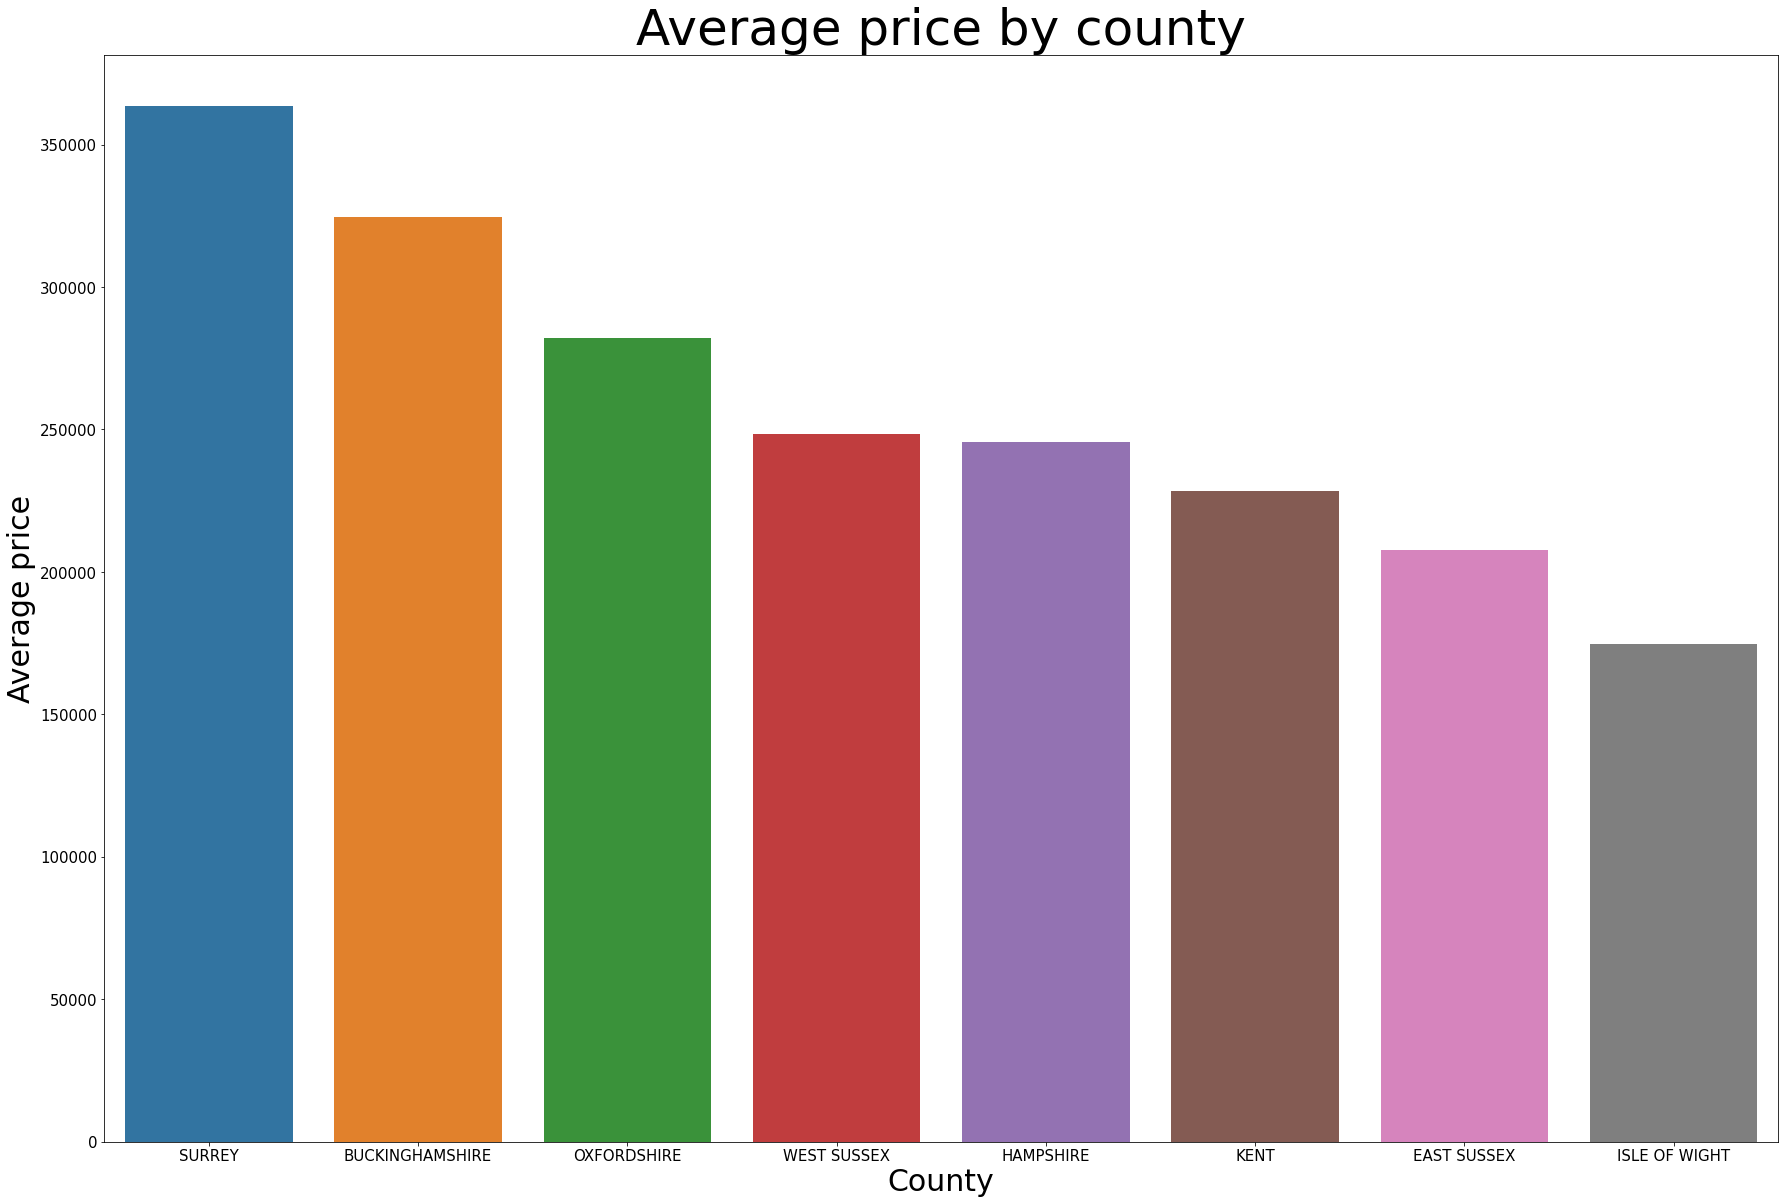

In [43]:
plt.figure(figsize=(30,20))
plt.figure(figsize=(30,20))
b = sns.barplot(data = df_county, x = "County", y = "Avg_Price",order= df_county.sort_values('Avg_Price',ascending = False).County);
b.axes.set_title("Average price by county",fontsize=50)
b.set_xlabel("County",fontsize=30)
b.set_ylabel("Average price",fontsize=30)
b.tick_params(labelsize=15)
plt.show()

/Users/jasonchan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


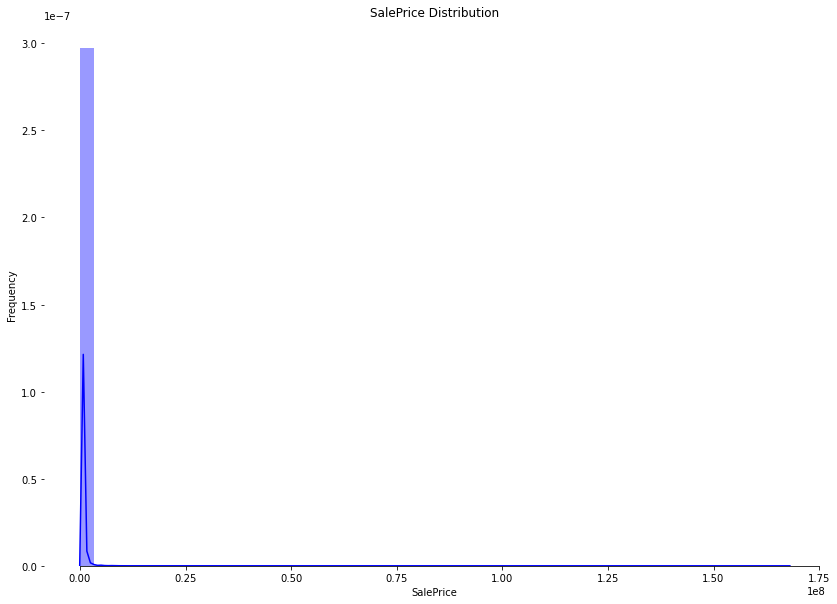

In [44]:
## sns.set_style("white")
sns.set_color_codes(palette="deep")
f,ax = plt.subplots(figsize=(14,10))

sns.distplot(df2['Price'], color="Blue" )
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution" )
sns.despine(trim=True, left=True)
plt.show()

In [45]:
print("Skewness : %f" % df2['Price'].skew() )
print("Kurtosis : %f" % df2['Price'].kurt())

Skewness : 82.976574
Kurtosis : 13078.923042


In [46]:
df3['Date of Transfer'] = pd.to_datetime(df3['Date of Transfer'])
# Ensure that this column is a date-time object so that we can use this later for plotting

In [47]:
df3["Year"] = pd.DatetimeIndex(df3["Date of Transfer"]).year

In [48]:
dataframe_year = df3.groupby("Year").agg(["mean"]).reset_index()
dataframe_year

,Year,Price
,,mean
0,1995,82932.098594
1,1996,86822.604102
2,1997,96165.380582
3,1998,109911.420422
4,1999,123399.276168
5,2000,145584.738546
6,2001,160741.499434
7,2002,185810.999287
8,2003,208516.994307


In [49]:
dataframe_year.columns = ["Year", "Avg_Price"]
dataframe_year.head()

,Year,Avg_Price
0,1995,82932.098594
1,1996,86822.604102
2,1997,96165.380582
3,1998,109911.420422
4,1999,123399.276168


Text(0, 0.5, 'Average price')

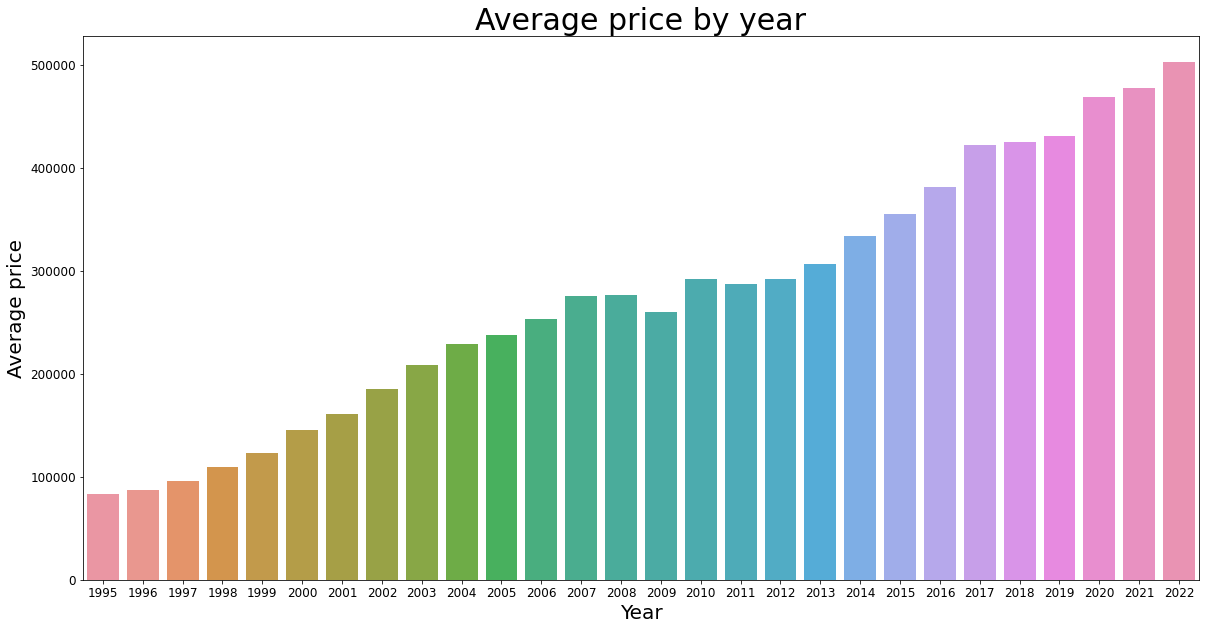

In [50]:
plt.figure(figsize=(20,10))
plot01 = sns.barplot(data = dataframe_year, x = "Year", y = "Avg_Price")
plot01.axes.set_title("Average price by year",fontsize=30)
plot01.tick_params(labelsize= 12)
plot01.set_xlabel("Year",fontsize=20)
plot01.set_ylabel("Average price",fontsize=20)

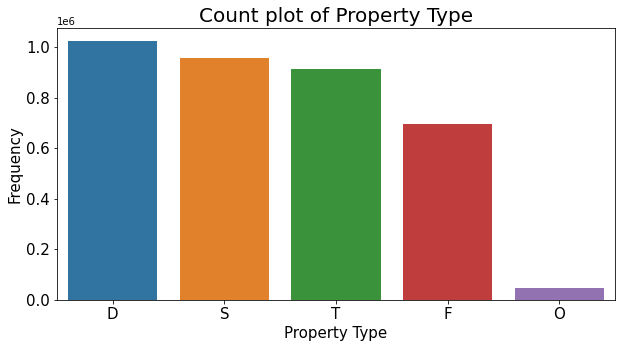

In [51]:
fig = plt.figure(figsize=(10,5))
plot02 = sns.countplot(x='Property Type', data=df3,order = df3['Property Type'].value_counts().index)
plot02.axes.set_title("Count plot of Property Type",fontsize=20)
plot02.set_xlabel("Property Type",fontsize=15)
plot02.set_ylabel("Frequency",fontsize=15)
plot02.tick_params(labelsize=15)
plt.ylabel('Frequency')

plt.show()

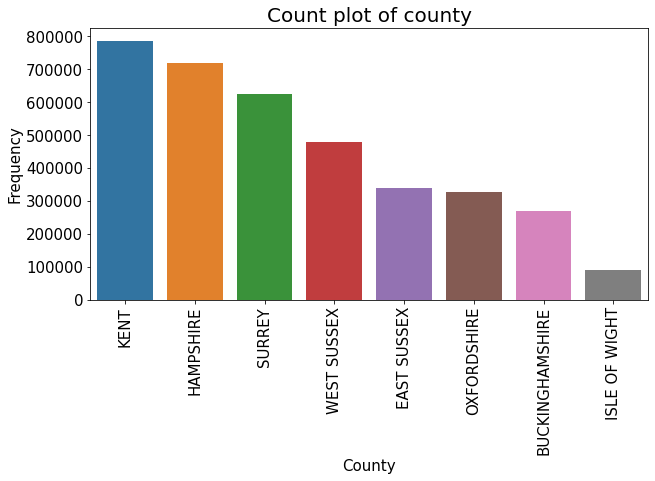

In [52]:
fig = plt.figure(figsize=(10,5))
plot03 = sns.countplot(x='County', data=df3,order = df3['County'].value_counts().index)
plot03.axes.set_title("Count plot of county",fontsize=20)
plot03.set_xlabel("County",fontsize=15)
plot03.set_ylabel("Frequency",fontsize=15)
plot03.tick_params(labelsize=15)
plt.xticks(rotation=90)
plt.show()

# Time series analysis

In [53]:
df2

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
22,95000,1995-11-17 00:00,GU32 1LJ,S,Y,F,2,NaN,CROSS ROAD COTTAGES,WEST MEON,PETERSFIELD,WINCHESTER,HAMPSHIRE,A,A
32,39000,1995-05-19 00:00,BN16 2TJ,F,N,L,RICHMOND COURT,FLAT 5,SEA LANE,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
40,62800,1995-06-30 00:00,RH15 9JS,S,N,F,54,NaN,POTTERS LANE,BURGESS HILL,BURGESS HILL,MID SUSSEX,WEST SUSSEX,A,A
41,59500,1995-02-07 00:00,GU34 2EW,T,N,F,108,NaN,GREENFIELDS AVENUE,ALTON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A
48,59999,1995-01-31 00:00,OX11 0AA,S,N,F,10,NaN,PARK CLOSE,DIDCOT,DIDCOT,SOUTH OXFORDSHIRE,OXFORDSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910699,825000,2022-08-02 00:00,RH19 2QA,S,N,F,BELMONT,NaN,FELCOT ROAD,FURNACE WOOD,EAST GRINSTEAD,MID SUSSEX,WEST SUSSEX,A,A
27910700,75000,2022-01-19 00:00,PO19 6EA,F,N,L,194,NaN,LONGLEY ROAD,NaN,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A
27910701,217000,2022-07-01 00:00,RH12 2TA,F,N,L,GREENACRES,27,NORTH PARADE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A
27910702,185000,2022-03-11 00:00,RH10 8XG,F,N,L,15,NaN,BOWMAN COURT,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A


In [54]:
pd.options.mode.chained_assignment = None
df2['Date of Transfer'] = pd.to_datetime(df2['Date of Transfer'])

In [55]:
df2

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
22,95000,1995-11-17,GU32 1LJ,S,Y,F,2,NaN,CROSS ROAD COTTAGES,WEST MEON,PETERSFIELD,WINCHESTER,HAMPSHIRE,A,A
32,39000,1995-05-19,BN16 2TJ,F,N,L,RICHMOND COURT,FLAT 5,SEA LANE,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
40,62800,1995-06-30,RH15 9JS,S,N,F,54,NaN,POTTERS LANE,BURGESS HILL,BURGESS HILL,MID SUSSEX,WEST SUSSEX,A,A
41,59500,1995-02-07,GU34 2EW,T,N,F,108,NaN,GREENFIELDS AVENUE,ALTON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A
48,59999,1995-01-31,OX11 0AA,S,N,F,10,NaN,PARK CLOSE,DIDCOT,DIDCOT,SOUTH OXFORDSHIRE,OXFORDSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910699,825000,2022-08-02,RH19 2QA,S,N,F,BELMONT,NaN,FELCOT ROAD,FURNACE WOOD,EAST GRINSTEAD,MID SUSSEX,WEST SUSSEX,A,A
27910700,75000,2022-01-19,PO19 6EA,F,N,L,194,NaN,LONGLEY ROAD,NaN,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A
27910701,217000,2022-07-01,RH12 2TA,F,N,L,GREENACRES,27,NORTH PARADE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A
27910702,185000,2022-03-11,RH10 8XG,F,N,L,15,NaN,BOWMAN COURT,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A


In [56]:
df2['month'] = df2['Date of Transfer'].dt.month
df2['year'] = df2['Date of Transfer'].dt.year

In [57]:
df2

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only,month,year
22,95000,1995-11-17,GU32 1LJ,S,Y,F,2,NaN,CROSS ROAD COTTAGES,WEST MEON,PETERSFIELD,WINCHESTER,HAMPSHIRE,A,A,11,1995
32,39000,1995-05-19,BN16 2TJ,F,N,L,RICHMOND COURT,FLAT 5,SEA LANE,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,5,1995
40,62800,1995-06-30,RH15 9JS,S,N,F,54,NaN,POTTERS LANE,BURGESS HILL,BURGESS HILL,MID SUSSEX,WEST SUSSEX,A,A,6,1995
41,59500,1995-02-07,GU34 2EW,T,N,F,108,NaN,GREENFIELDS AVENUE,ALTON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A,2,1995
48,59999,1995-01-31,OX11 0AA,S,N,F,10,NaN,PARK CLOSE,DIDCOT,DIDCOT,SOUTH OXFORDSHIRE,OXFORDSHIRE,A,A,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910699,825000,2022-08-02,RH19 2QA,S,N,F,BELMONT,NaN,FELCOT ROAD,FURNACE WOOD,EAST GRINSTEAD,MID SUSSEX,WEST SUSSEX,A,A,8,2022
27910700,75000,2022-01-19,PO19 6EA,F,N,L,194,NaN,LONGLEY ROAD,NaN,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A,1,2022
27910701,217000,2022-07-01,RH12 2TA,F,N,L,GREENACRES,27,NORTH PARADE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A,7,2022
27910702,185000,2022-03-11,RH10 8XG,F,N,L,15,NaN,BOWMAN COURT,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A,3,2022


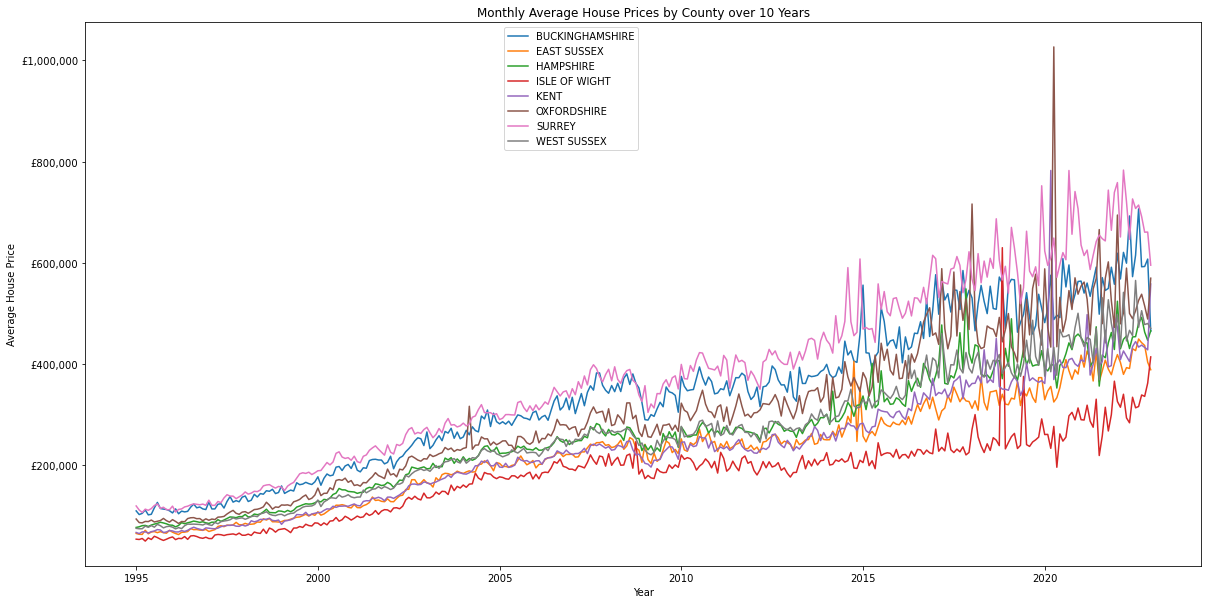

In [58]:
import matplotlib.ticker as mtick

grouped_df = df2.groupby(['County', 'year', 'month'])['Price'].mean().reset_index()

fig, ax = plt.subplots(figsize=(20, 10))

for county in grouped_df['County'].unique():
    county_data = grouped_df[grouped_df['County'] == county]
    ax.plot(county_data['year'] + (county_data['month'] - 1) / 12, county_data['Price'], label=county)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Average House Price')
ax.set_title('Monthly Average House Prices by County over 10 Years')

# Format y-axis tick labels as regular numbers
fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.legend(bbox_to_anchor=(0.5, 1))

plt.show()

In [59]:
df2['Price'].describe()

count    3.681940e+06
mean     2.694642e+05
std      5.621138e+05
min      1.000000e+00
25%      1.200000e+05
50%      2.000000e+05
75%      3.200000e+05
max      1.680000e+08
Name: Price, dtype: float64

In [62]:
lq = df2["Price"].quantile(0.01)
uq = df2["Price"].quantile(0.99)
# df_filtered03 = df2[(df2["Price"] < 607500) & (df2["Price"] > lq)]
df_filtered03 = df2[(df2["Price"] < 607500) & (df2["Price"] > lq)]

In [63]:
print(lq)
print(uq)

30000.0
1275000.0


In [64]:
df_filtered03['Price'].describe()

count    3.415915e+06
mean     2.165885e+05
std      1.278937e+05
min      3.000100e+04
25%      1.180000e+05
50%      1.900000e+05
75%      2.900000e+05
max      6.073500e+05
Name: Price, dtype: float64

In [65]:
df_filtered03

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only,month,year
22,95000,1995-11-17,GU32 1LJ,S,Y,F,2,NaN,CROSS ROAD COTTAGES,WEST MEON,PETERSFIELD,WINCHESTER,HAMPSHIRE,A,A,11,1995
32,39000,1995-05-19,BN16 2TJ,F,N,L,RICHMOND COURT,FLAT 5,SEA LANE,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,5,1995
40,62800,1995-06-30,RH15 9JS,S,N,F,54,NaN,POTTERS LANE,BURGESS HILL,BURGESS HILL,MID SUSSEX,WEST SUSSEX,A,A,6,1995
41,59500,1995-02-07,GU34 2EW,T,N,F,108,NaN,GREENFIELDS AVENUE,ALTON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A,2,1995
48,59999,1995-01-31,OX11 0AA,S,N,F,10,NaN,PARK CLOSE,DIDCOT,DIDCOT,SOUTH OXFORDSHIRE,OXFORDSHIRE,A,A,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910698,199008,2022-08-11,RH16 3TX,F,N,L,22,NaN,THE PINES,NaN,HAYWARDS HEATH,MID SUSSEX,WEST SUSSEX,A,A,8,2022
27910700,75000,2022-01-19,PO19 6EA,F,N,L,194,NaN,LONGLEY ROAD,NaN,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A,1,2022
27910701,217000,2022-07-01,RH12 2TA,F,N,L,GREENACRES,27,NORTH PARADE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A,7,2022
27910702,185000,2022-03-11,RH10 8XG,F,N,L,15,NaN,BOWMAN COURT,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A,3,2022


<AxesSubplot:xlabel='Price'>

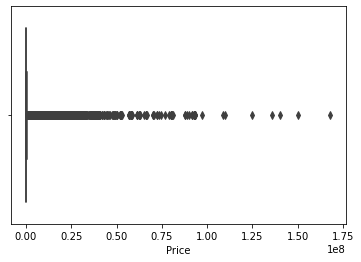

In [66]:
sns.boxplot(data = df2 , x = 'Price')

<AxesSubplot:xlabel='Price'>

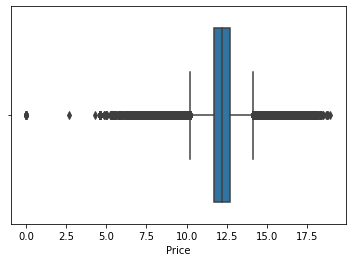

In [67]:
# log transformation to response variable price
ax = sns.boxplot(data = df2, x = np.log(df2['Price']))
ax

In [69]:
# Calculate summary statistics
print("Summary Statistics:")
print("Mean: {:.2f}".format(np.mean(np.log(df2["Price"]))))
print("Median: {:.2f}".format(np.median(np.log(df2["Price"]))))
print("Minimum: {:.2f}".format(np.min(np.log(df2["Price"]))))
print("Maximum: {:.2f}".format(np.max(np.log(df2["Price"]))))
print("25th percentile: {:.2f}".format(np.percentile(np.log(df2["Price"]), 25)))
print("75th percentile: {:.2f}".format(np.percentile(np.log(df2["Price"]), 75)))

Summary Statistics:
Mean: 12.17
Median: 12.21
Minimum: 0.00
Maximum: 18.94
25th percentile: 11.70
75th percentile: 12.68


In [70]:
lower = 10.72
higher = 13.66

In [71]:
df_transformed = df2.copy()
df_transformed['Price'] = np.log(df2['Price'])
df_transformed_mean = df_transformed['Price'].mean()
df_transformed_median = df_transformed['Price'].median()

In [72]:
price_outliers_below = df_transformed.loc[df_transformed['Price'] < lower]
price_outliers_abow = df_transformed.loc[df_transformed['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than ", lower)
print(price_outliers_abow['Price'].count(), "entries having 'Price' value greater than", higher)

125735 entries having 'Price' value lower than  10.72
93973 entries having 'Price' value greater than 13.66


In [73]:
# total data removed  = 219,708 / 3681940 * 100 = 5.97%

df_transformed["Price"] = df_transformed["Price"].apply(lambda x: lower if x < lower else x)
df_transformed["Price"] = df_transformed["Price"].fillna(df_transformed_median)

df_transformed["Price"] = df_transformed["Price"].apply(lambda x: higher if x > higher else x)
df_transformed["Price"] = df_transformed["Price"].fillna(df_transformed_median)

price_outliers_below = df_transformed.loc[df_transformed['Price'] < lower]
price_outliers_above = df_transformed.loc[df_transformed['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than ", lower)
print(price_outliers_above['Price'].count(), "entries having 'Price' value greater than ", higher)

0 entries having 'Price' value lower than  10.72
0 entries having 'Price' value greater than  13.66


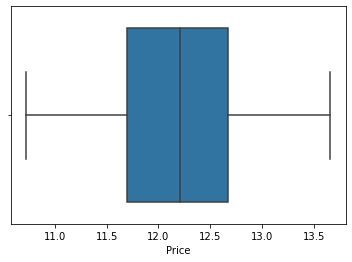

In [74]:
sns.boxplot(data = df_transformed, x = 'Price');

In [75]:
df_transformed

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only,month,year
22,11.461632,1995-11-17,GU32 1LJ,S,Y,F,2,NaN,CROSS ROAD COTTAGES,WEST MEON,PETERSFIELD,WINCHESTER,HAMPSHIRE,A,A,11,1995
32,10.720000,1995-05-19,BN16 2TJ,F,N,L,RICHMOND COURT,FLAT 5,SEA LANE,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,5,1995
40,11.047710,1995-06-30,RH15 9JS,S,N,F,54,NaN,POTTERS LANE,BURGESS HILL,BURGESS HILL,MID SUSSEX,WEST SUSSEX,A,A,6,1995
41,10.993732,1995-02-07,GU34 2EW,T,N,F,108,NaN,GREENFIELDS AVENUE,ALTON,ALTON,EAST HAMPSHIRE,HAMPSHIRE,A,A,2,1995
48,11.002083,1995-01-31,OX11 0AA,S,N,F,10,NaN,PARK CLOSE,DIDCOT,DIDCOT,SOUTH OXFORDSHIRE,OXFORDSHIRE,A,A,1,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910699,13.623139,2022-08-02,RH19 2QA,S,N,F,BELMONT,NaN,FELCOT ROAD,FURNACE WOOD,EAST GRINSTEAD,MID SUSSEX,WEST SUSSEX,A,A,8,2022
27910700,11.225243,2022-01-19,PO19 6EA,F,N,L,194,NaN,LONGLEY ROAD,NaN,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A,1,2022
27910701,12.287653,2022-07-01,RH12 2TA,F,N,L,GREENACRES,27,NORTH PARADE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A,7,2022
27910702,12.128111,2022-03-11,RH10 8XG,F,N,L,15,NaN,BOWMAN COURT,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A,3,2022


In [76]:
df_transformed.columns

Index(['Price', 'Date of Transfer', 'Postcode', 'Property Type', 'Old/New',
       'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City',
       'District', 'County', 'PPD Category Type',
       'Record Status - monthly file only', 'month', 'year'],
      dtype='object')

In [77]:
df_transformed = df_transformed.drop(['Locality','PPD Category Type','Record Status - monthly file only','Street','SAON','PAON','Postcode'] ,axis = 1)

In [78]:
df_transformed

# NEED THIS SECTION FOR CREATING A NEW DATAFRAME WITH OUTLIERS REMOVED.

,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,month,year
22,11.461632,1995-11-17,S,Y,F,PETERSFIELD,WINCHESTER,HAMPSHIRE,11,1995
32,10.720000,1995-05-19,F,N,L,LITTLEHAMPTON,ARUN,WEST SUSSEX,5,1995
40,11.047710,1995-06-30,S,N,F,BURGESS HILL,MID SUSSEX,WEST SUSSEX,6,1995
41,10.993732,1995-02-07,T,N,F,ALTON,EAST HAMPSHIRE,HAMPSHIRE,2,1995
48,11.002083,1995-01-31,S,N,F,DIDCOT,SOUTH OXFORDSHIRE,OXFORDSHIRE,1,1995
...,...,...,...,...,...,...,...,...,...,...
27910699,13.623139,2022-08-02,S,N,F,EAST GRINSTEAD,MID SUSSEX,WEST SUSSEX,8,2022
27910700,11.225243,2022-01-19,F,N,L,CHICHESTER,CHICHESTER,WEST SUSSEX,1,2022
27910701,12.287653,2022-07-01,F,N,L,HORSHAM,HORSHAM,WEST SUSSEX,7,2022
27910702,12.128111,2022-03-11,F,N,L,CRAWLEY,CRAWLEY,WEST SUSSEX,3,2022


In [79]:
df_transformed_model = df_transformed.copy()

In [80]:
df_transformed['Town/City'] = df_transformed ['Town/City'].factorize()[0].astype('float32')
df_transformed['Old/New'] = df_transformed ['Old/New'].factorize()[0].astype('float32')
df_transformed['County'] = df_transformed ['County'].factorize()[0].astype('float32')
df_transformed['Duration'] = df_transformed ['Duration'].factorize()[0].astype('float32')
df_transformed['District'] = df_transformed ['District'].factorize()[0].astype('float32')
df_encoded1 = pd.get_dummies(df_transformed, columns = ["Property Type"], prefix = ["Property_Type_is_"])

In [81]:
df_encoded1

,Price,Date of Transfer,Old/New,Duration,Town/City,District,County,month,year,Property_Type_is__D,Property_Type_is__F,Property_Type_is__O,Property_Type_is__S,Property_Type_is__T
22,11.461632,1995-11-17,0.0,0.0,0.0,0.0,0.0,11,1995,0,0,0,1,0
32,10.720000,1995-05-19,1.0,1.0,1.0,1.0,1.0,5,1995,0,1,0,0,0
40,11.047710,1995-06-30,1.0,0.0,2.0,2.0,1.0,6,1995,0,0,0,1,0
41,10.993732,1995-02-07,1.0,0.0,3.0,3.0,0.0,2,1995,0,0,0,0,1
48,11.002083,1995-01-31,1.0,0.0,4.0,4.0,2.0,1,1995,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910699,13.623139,2022-08-02,1.0,0.0,108.0,2.0,1.0,8,2022,0,0,0,1,0
27910700,11.225243,2022-01-19,1.0,1.0,21.0,6.0,1.0,1,2022,0,1,0,0,0
27910701,12.287653,2022-07-01,1.0,1.0,90.0,53.0,1.0,7,2022,0,1,0,0,0
27910702,12.128111,2022-03-11,1.0,1.0,17.0,57.0,1.0,3,2022,0,1,0,0,0


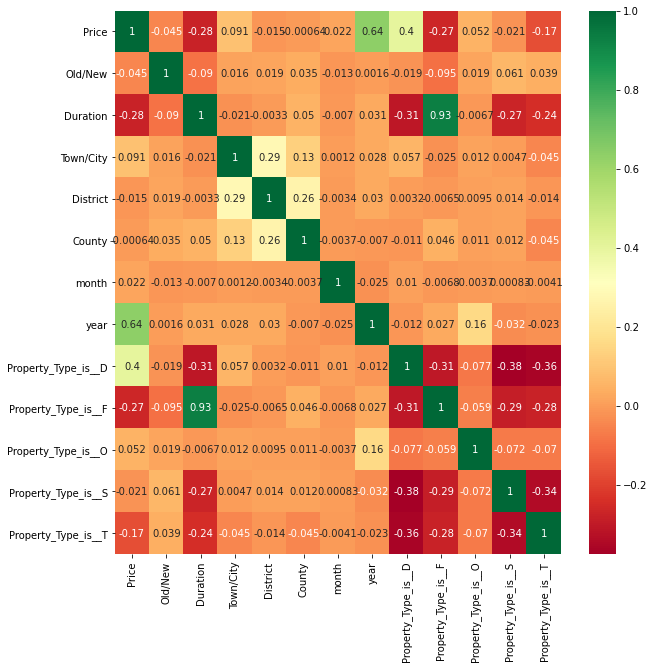

In [82]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_encoded1[df_encoded1.corr().index].corr(), annot = True, cmap = 'RdYlGn')
plt.show()

From the heatmap above reveals that year is strongly correlated to the housing price which comes to no surprise. There also seems to be some correlation between duration and property type with respect to price. Also notice from the table below that old/new of the house, that median value is very similar and suggest weak correlation to price. Also supported by the heatmap showing close to 0 correlation.

In [83]:
filtered_df_property_outliers.groupby('Old/New')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Old/New,,,,,,,,
N,3166111.0,231909.660202,166579.014148,1001.0,118000.0,192000.0,299835.0,2045059.0
Y,335382.0,245879.096409,147373.940472,1125.0,140000.0,217500.0,320000.0,2040000.0


# Modelling

In [160]:
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [87]:
filtered_df_property_outliers_copy

,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only,Year,Postcode_01
182,102500,1995-07-28 00:00,PO20 8PX,D,N,F,KILMEEN,NaN,BRIAR AVENUE,WEST WITTERING,CHICHESTER,CHICHESTER,WEST SUSSEX,A,A,1995,PO20
221,94000,1995-10-27 00:00,ME15 9XA,D,N,F,18,NaN,HALSTOW CLOSE,MAIDSTONE,MAIDSTONE,MAIDSTONE,KENT,A,A,1995,ME15
288,73500,1995-07-07 00:00,SO40 4YR,D,N,F,8,NaN,BILBERRY DRIVE,MARCHWOOD,SOUTHAMPTON,NEW FOREST,HAMPSHIRE,A,A,1995,SO40
513,121000,1995-08-31 00:00,GU21 3PW,D,N,F,5,NaN,MUIRFIELD ROAD,WOKING,WOKING,WOKING,SURREY,A,A,1995,GU21
600,129950,1995-07-26 00:00,HP13 5EL,D,N,F,39,NaN,DISRAELI CRESCENT,HIGH WYCOMBE,HIGH WYCOMBE,WYCOMBE,BUCKINGHAMSHIRE,A,A,1995,HP13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910672,192000,2022-07-15 00:00,RH11 7EZ,T,N,F,26,NaN,EWHURST CLOSE,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A,2022,RH11
27910678,317000,2022-04-05 00:00,BN16 1AD,T,N,F,129,NaN,DOWNS WAY,EAST PRESTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2022,BN16
27910683,365000,2022-08-10 00:00,BN16 3PE,T,N,F,19,NaN,WALDERS ROAD,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A,2022,BN16
27910684,355000,2022-07-05 00:00,PO21 5AP,T,N,F,9,NaN,ALDING CRESCENT,NaN,BOGNOR REGIS,ARUN,WEST SUSSEX,A,A,2022,PO21


In [145]:
# MODEL 1 

X = filtered_df_property_outliers_copy[['Property Type' , 'Old/New','Duration','County','District','Year']]
y = filtered_df_property_outliers_copy[['Price']] # target variable

column_trans = make_column_transformer(
                (OneHotEncoder(handle_unknown = 'ignore'), ['Duration','County','District','Old/New']),
                (OrdinalEncoder(), ['Property Type','Year']),
                remainder = 'drop')

# We set handle_unknown='ignore' to avoid errors when the validation data contains
# classes that aren't represented in the training data

# BEST: USE df_filtered03, above removed was district.

# also used df_transformed_model

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
decicion = DecisionTreeRegressor()
random = RandomForestRegressor()
linear = LinearRegression()

In [148]:
# Construct some pipelines

pipe_lr = make_pipeline(column_trans,linear)
pipe_rf = make_pipeline(column_trans,random)
pipe_dt = make_pipeline(column_trans,decicion)

In [139]:
# DECISION TREE 

pipe_dt.fit(X_train,y_train.values.ravel())
predictions_dt = pipe_dt.predict(X_test)
print(sqrt(mean_squared_error(y_test, predictions_dt))) # Root mean square error

73598.68592243252


In [149]:
# LINEAR REGRESSION 
pipe_lr.fit(X_train,y_train.values.ravel())
predictions_lr = pipe_lr.predict(X_test)
print(sqrt(mean_squared_error((y_test),(predictions_lr))))


# The regression has five key assumptions:
# Linear relationship.
# Multivariate normality.
# No or little multicollinearity.
# No auto-correlation.
# Homoscedasticity


83418.15373936505


In [150]:
# MODEL 2 WITH 'OLD/NEW' removed 

X1 = filtered_df_property_outliers_copy[['Property Type','Duration','County','District','Year']]
y1 = filtered_df_property_outliers_copy[['Price']] # target variable

column_trans1 = make_column_transformer(
                (OneHotEncoder(handle_unknown = 'ignore'), ['Duration','County','District']),
                (OrdinalEncoder(), ['Property Type','Year']),
                remainder = 'drop')

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

decicion1 = DecisionTreeRegressor()
random1 = RandomForestRegressor()
linear1 = LinearRegression()

pipe_lr1 = make_pipeline(column_trans1,linear1)
pipe_rf1 = make_pipeline(column_trans1,random1)
pipe_dt1 = make_pipeline(column_trans1,decicion1)

pipe_dt1.fit(X_train,y_train.values.ravel())
predictions_dt1 = pipe_dt1.predict(X_test)
print(sqrt(mean_squared_error(y_test, predictions_dt1)))

# LINEAR REGRESSION 
pipe_lr1.fit(X_train,y_train.values.ravel())
predictions_lr1 = pipe_lr1.predict(X_test)
print(sqrt(mean_squared_error((y_test),(predictions_lr1))))

0.301656211109958
0.3642529912955638


In [95]:
# MODEL 3 with 'Old/New' and 'District' removed 


X2 = filtered_df_property_outliers_copy[['Property Type','Duration','County','Year']]
y2 = filtered_df_property_outliers_copy[['Price']] # target variable

column_trans2 = make_column_transformer(
                (OneHotEncoder(handle_unknown = 'ignore'), ['Duration','County']),
                (OrdinalEncoder(), ['Property Type','Year']),
                remainder = 'drop')

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

decicion2 = DecisionTreeRegressor()
random2 = RandomForestRegressor()
linear2 = LinearRegression()

pipe_lr2 = make_pipeline(column_trans2,linear2)
pipe_rf2 = make_pipeline(column_trans2,random2)
pipe_dt2 = make_pipeline(column_trans2,decicion2)

pipe_dt2.fit(X_train,y_train.values.ravel())
predictions_dt2 = pipe_dt2.predict(X_test)
print(sqrt(mean_squared_error(y_test, predictions_dt2)))

# Linear regression 
pipe_lr2.fit(X_train2,y_train2.values.ravel())
predictions_lr2 = pipe_lr2.predict(X_test2)
print(sqrt(mean_squared_error((y_test2),(predictions_lr2))))


# Random Forest 
pipe_rf2.fit(X_train2,y_train2.values.ravel())
predictions_rf2 = pipe_rf2.predict(X_test2)
print(sqrt(mean_squared_error((y_test2),(predictions_rf2))))

77159.57017545689
85959.64402419105
77148.84508047673


In [96]:
# calculate R squared and adjusted R squared for both models

#  comparing model 1 and 2 

pipe_lr.fit(X,y)
r2_1 = pipe_lr.score(X, y)

pipe_lr1.fit(X1,y1)
r2_2 = pipe_lr1.score(X1, y1)


n = X.shape[0]
k1 = X.shape[1]
k2 = X1.shape[1]


r2_adj_1 = 1 - ((1 - r2_1) * (n - 1) / (n - k1 - 1))
r2_adj_2 = 1 - ((1 - r2_2) * (n - 1) / (n - k2 - 1))

print("Adjusted R squared for model 1:", r2_adj_1)

print("Adjusted R squared for model 2 :", r2_adj_2)


Adjusted R squared for model 1: 0.6124039412393751
Adjusted R squared for model 2 : 0.6101269432092484


There is no improvement in the R squared adjusted value after including the variable 'old/New' in the model. This is anticipated since there is no correlation between price and old/new variable as seen on the heatmap.
Hence we shall drop this column.

In [97]:
# bcomparing model 2 and 3 

pipe_lr1.fit(X1,y1)
r2_1 = pipe_lr1.score(X1, y1)

pipe_lr2.fit(X2,y2)
r2_2 = pipe_lr2.score(X2, y2)


n = X.shape[0]
k1 = X1.shape[1]
k2 = X2.shape[1]


r2_adj_1 = 1 - ((1 - r2_1) * (n - 1) / (n - k1 - 1))
r2_adj_2 = 1 - ((1 - r2_2) * (n - 1) / (n - k2 - 1))

print("Adjusted R squared for model 2:", r2_adj_1)

print("Adjusted R squared for model 3 :", r2_adj_2)

Adjusted R squared for model 2: 0.6101269432092484
Adjusted R squared for model 3 : 0.5896784406964901


We can see that actually by including district in our model the r squared adjusted has beed increased by 0.03. Whether this is large enough such that its worth including in the model is up for debate.

In [154]:
# MODEL 2 WITH 'OLD/NEW' removed 

X1 = filtered_df_property_outliers_copy[['Property Type','Duration','County','District','Year']]
y1 = filtered_df_property_outliers_copy[['Price']] # target variable

column_trans1 = make_column_transformer(
                (OneHotEncoder(handle_unknown = 'ignore'), ['Duration','County','District']),
                (OrdinalEncoder(), ['Property Type','Year']),
                remainder = 'drop')

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

linear1 = LinearRegression()

pipe_lr1 = make_pipeline(column_trans1,linear1)

pipe_dt1.fit(X_train,y_train.values.ravel())
predictions_dt1 = pipe_dt1.predict(X_test)
print(sqrt(mean_squared_error(y_test, predictions_dt1)))

# LINEAR REGRESSION 
pipe_lr1.fit(X_train,y_train.values.ravel())
predictions_lr1 = pipe_lr1.predict(X_test)
print(sqrt(mean_squared_error((y_test),(predictions_lr1))))

74416.40365591207
83779.40629074187


<Figure size 1440x720 with 0 Axes>

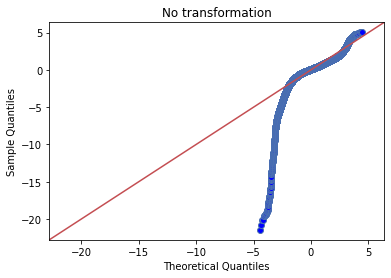

In [155]:
# model 2
import statsmodels.api as sm


fig = plt.figure(figsize = (20,10))

# stats.probplot(predictions_lr)

risiduals = predictions_lr1 - y_test.to_numpy().reshape(len(y_test),)

sm.qqplot(risiduals,fit=True,line='45',dist=stats.norm)

plt.title("No transformation")

plt.show()

<Figure size 1440x720 with 0 Axes>

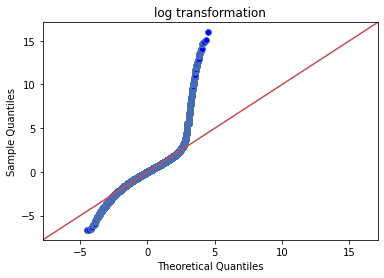

In [153]:
# model 2 logged price
import statsmodels.api as sm


fig = plt.figure(figsize = (20,10))

# stats.probplot(predictions_lr)

risiduals = predictions_lr1 - y_test.to_numpy().reshape(len(y_test),)

sm.qqplot(risiduals,fit=True,line='45',dist=stats.norm)

plt.title("log transformation")

plt.show()

We logged the response variable price but the plot reveals the residuals are still far from being normal. This violates the assumption that the residuals are normally distributed.


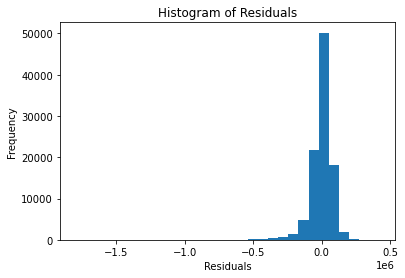

In [100]:
# Lets see a histogram of the residuals

residuals = predictions_lr1[:100000] - y_test.to_numpy()[:100000].reshape(100000,)
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

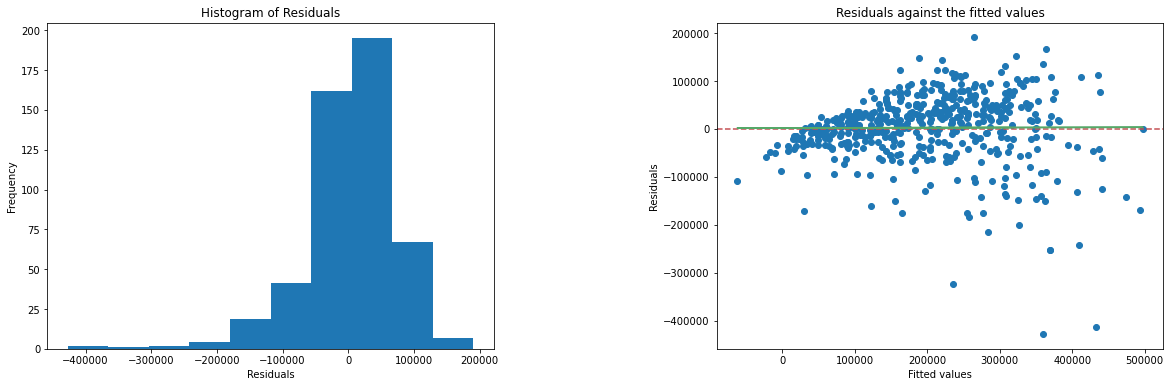

In [101]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2 , figsize=(16, 6))

residuals = predictions_lr1[:500] - y_test.to_numpy()[:500].reshape(500,)

# Lets see a histogram of the residuals
ax1.hist(residuals)
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Residuals')

# Plot the residuals against the fitted values
ax2.scatter(predictions_lr[:500], residuals)
ax2.set_xlabel('Fitted values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals against the fitted values')
ax2.axhline(y=0, linestyle='--', color='r')

# Calculate the slope and intercept of the line of best fit
slope, intercept = np.polyfit(predictions_lr[:500], residuals, 1)

# Plot the line of best fit
plt.plot(predictions_lr[:500], slope * predictions_lr[:500] + intercept, color='g')


fig.set_size_inches(20, 6)

# Display the figure
plt.subplots_adjust(wspace=0.5)
plt.show()

Above figure shows a residual plot of the residuals against the fitted values. The purpose of the plot is to check if the assumption of heteroscedasticity is satisfied in the linear model. Clearly it shows a ‘right-opening megaphone’ residuals plot implying that the variance is not constant between observations. We can observe that the vertical scatter increases as the response variable (price) increases. The same conclusion is reached on the plot of the left. The violation of this assumption also means that the errors are not normally distributed. To address this issue, we can attempt to do a log transformation of the response variable to stabilise the variance and achieve heteroscedasticity.

Also, a line of best fit is fitted onto the residuals plot (shown in green) in figure x. The good news is that the mean of the residuals is 0 implying that the model is not consistently overestimating or underestimating the true value.  

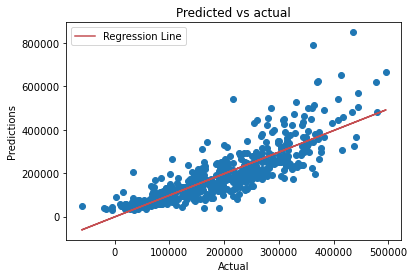

In [102]:
slope, intercept, r_value, p_value, std_err = stats.linregress(predictions_lr[:500], y_test.to_numpy()[:500].reshape(500,))

# Create a scatter plot of the data
plt.scatter(predictions_lr1[:500],y_test[:500])

# Add the regression line to the plot
plt.plot(predictions_lr1[:500], intercept + slope*predictions_lr1[:500], 'r', label='Regression Line')

# Add labels and a legend to the plot
plt.ylabel('Predictions')
plt.xlabel('Actual')
plt.title('Predicted vs actual')
plt.legend()

# Show the plot
plt.show()

# Hyperparameter tuning for decison tree and random forest 

Using model 1

In [181]:
# MODEL 1 

X = filtered_df_property_outliers_copy[['Property Type' , 'Old/New','Duration','County','District','Year']]
y = filtered_df_property_outliers_copy[['Price']] # target variable

column_trans = make_column_transformer(
                (OneHotEncoder(handle_unknown = 'ignore'), ['Duration','County','District','Property Type','Old/New']),
                (OrdinalEncoder(), ['Year']),
                remainder = 'drop')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decicion = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=90)

pipe_dt = make_pipeline(column_trans,decicion)


# I HAVE MOVED PROPERTY TYPE FROM ORDINAL ENCODING TO ONEHOTENCODING TO DEAL WITH MISSING VALUES IN THE TEST SET.

# Get training and test scores, see chatgbt 

In [183]:
# AFTER HYPERPARAMTER TUNING
pipe_dt.fit(X_train,y_train.values.ravel())
predictions_dt = pipe_dt.predict(X_test)
print(sqrt(mean_squared_error(y_test, predictions_dt)))

77133.69270633737


In [105]:
# BEFORE
pipe_dt.fit(X_train,y_train.values.ravel())
predictions_dt = pipe_dt2.predict(X_test)
print(sqrt(mean_squared_error(y_test, predictions_dt)))

77134.54467929238


/Users/jasonchan/opt/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [106]:
# BEFORE HYPERPARAMETER TUNING
# Compute the training accuracy
training_accuracy = pipe_dt.score(X_train, y_train)
print('Training accuracy:', training_accuracy)

# Compute the testing accuracy
testing_accuracy = pipe_dt.score(X_test, y_test)
print('Testing accuracy:', testing_accuracy)

Training accuracy: 0.7226830856776532
Testing accuracy: 0.7010921249069956


In [110]:
# AFTER HYPERPARAMTER TUNING

# Compute the training accuracy
training_accuracy = pipe_dt.score(X_train, y_train)
print('Training accuracy:', training_accuracy)

# Compute the testing accuracy
testing_accuracy = pipe_dt.score(X_test, y_test)
print('Testing accuracy:', testing_accuracy)

Training accuracy: 0.6669369703048522
Testing accuracy: 0.6716466069119805


According to the paper “Theoretical comparison between the Gini Index and Information Gain criteria” [1], the choice of the splitting criteria does not make much of a difference in the tree's performance. For this reason, the default method used, which is the “gini” impurity measure will be left untouched. 

[1] Laura Elena Raileanu and Kilian Stoffel, “Theoretical comparison between the Gini Index and Information Gain criteria” Annals of Mathematics and Artificial Intelligence 41: 77–93, 2004.


In [107]:
%%time
# Decision tree 
import numpy as np 

max_depth = [3,5,7,9,11,13,15,17,19]

max_leaf_nodes = [60,70,80,90,100]

parameters = dict(
                decisiontreeregressor__max_leaf_nodes=max_leaf_nodes,
                decisiontreeregressor__max_depth=max_depth)

grid_search = GridSearchCV(pipe_dt, parameters, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X,y)

grid_search.best_estimator_.get_params()

CPU times: user 5min 15s, sys: 4.34 s, total: 5min 20s
Wall time: 5min 22s


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    ['Duration', 'County', 'District',
                                     'Property Type']),
                                   ('ordinalencoder', OrdinalEncoder(),
                                    ['Old/New', 'Year'])])),
  ('decisiontreeregressor',
   DecisionTreeRegressor(max_depth=15, max_leaf_nodes=90))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Duration', 'County', 'District',
                                   'Property Type']),
                                 ('ordinalencoder', OrdinalEncoder(),
                                  ['Old/New', 'Year'])]),
 'decisiontreeregressor': DecisionTreeRegressor(max_dept

The above code evaluates all 9x5 = 45 combinations of max_depth and max_leaf_nodes and it will train each model five times since we are using a five-fold cross validation. In other words, there will be 45x5 rounds of training! Now we see that after hyperparameter tuning and implementing the best parameters into the model, the training and testing accuracy actually decreases from the default parameters but only slightly. This can be expected since there are billions of other possible combinations and we have only considered two hyperparameters to tune in the model. The search becomes computationally costly as the number of combinations increase. For very large search space, we recommend using RandomizedSearchCV which instead of trying out all combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration (page 81).

In [122]:
pipe_dt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'decisiontreeregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__onehotencoder', 'columntransformer__ordinalencoder', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__ordinalencoder__categories', 'columntransformer__ordinalencoder__dtype', 'decisiontreeregressor__ccp_alpha', 'decisiontreeregressor__criterion', 'decisiontreeregressor__max_depth', 'decisiontreeregressor__max_features', 'decisiontreeregressor__max_leaf_nodes', 'decisiontreeregressor__min_impurity_decrease', 'decisiontreeregressor__min_impurity_split', 'decisiontreeregressor__min_sa